## Fake News Detection Project

## 1. Data Preprocessing
Data Preprocessing in machine learning is the preparation of data through cleaning, normalization, and feature engineering to improve model performance and accuracy. This step is essential for efficient and accurate data analysis or machine learning model performance. 

Loading the Dataset

In [1]:
import pandas as pd

#Read the dataset
df=pd.read_csv("D:\Fake News Detection\My dataset\FakeNewsNet.csv")

In [2]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


Check for missing values

In [4]:
# Check for missing values
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

Drop missing values

In [5]:
# Drop missing values
df.dropna(inplace=True)
df.isnull().sum()

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return " ".join(words)

df['title'] = df['title'].apply(clean_text)
print(df['title'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    kandi burruss explodes rape accusation real ho...
1     peoples choice awards 2018 best red carpet looks
2    sophia bush sends sweet birthday message one t...
3    colombian singer maluma sparks rumours inappro...
4    gossip girl 10 years later upper east siders s...
Name: title, dtype: object


Lemmatization of the title

In [7]:
#Lemmatization of the title
lemmatizer = WordNetLemmatizer()

def lemmatizetitle(title):
    words = word_tokenize(title)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

df["title"] = df["title"].apply(lemmatizetitle)
df["title"].head()


0    kandi burruss explodes rape accusation real ho...
1        people choice award 2018 best red carpet look
2    sophia bush sends sweet birthday message one t...
3    colombian singer maluma spark rumour inappropr...
4    gossip girl 10 year later upper east siders sh...
Name: title, dtype: object

### Exploratory Data Analysis

Distribution of Real vs Fake News

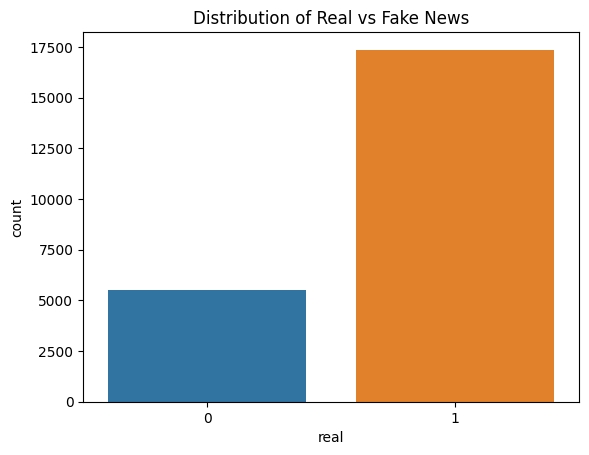

In [8]:
#Distribution of Real vs Fake News
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='real', data=df)
plt.title('Distribution of Real vs Fake News')
plt.show()


Word Cloud Visualization

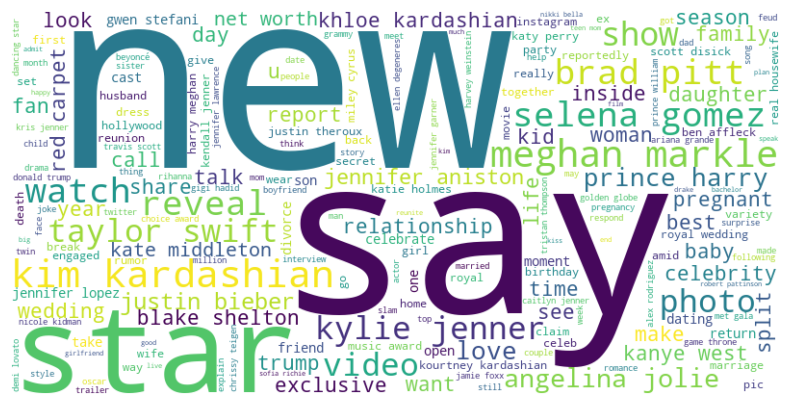

In [9]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the titles into a single string
all_titles = ' '.join(df['title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Plotting the word cloud
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.imshow(wordcloud, interpolation='bilinear')  # Display the generated word cloud image
plt.axis('off')  # Hide the axis
plt.show()  # Display the plot


Top 15 Source Domains

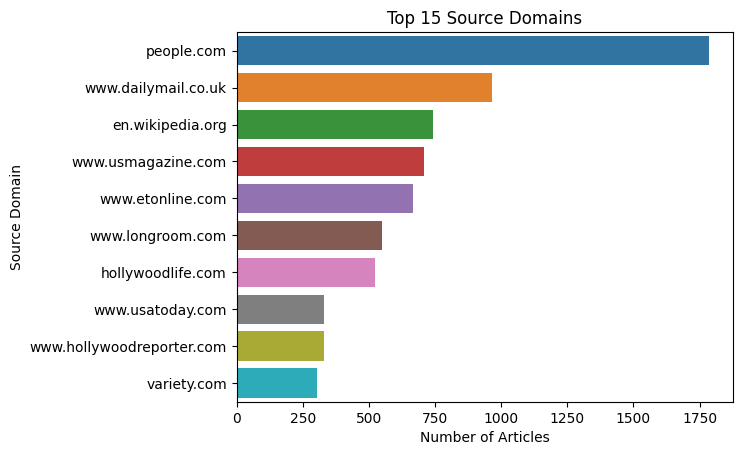

In [10]:
top_domains = df['source_domain'].value_counts().head(10)
sns.barplot(y=top_domains.index, x=top_domains.values)
plt.title('Top 15 Source Domains')
plt.xlabel('Number of Articles')
plt.ylabel('Source Domain')
plt.show()


## 2. Feature Engineering
### Convert the text data into numerical data using TF-IDF vectorization.

In [11]:
# Vectorize the title column using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['title']).toarray()
y = df['real']

## 3. Model Building
### Splitting the Dataset
Split the dataset into training, testing, and validation sets (70%, 10%, 20%).

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets (70%, 10%, 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [13]:
# Print the shapes of the training, validation, and test sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (16005, 5000) (16005,)
Validation set: (2287, 5000) (2287,)
Test set: (4574, 5000) (4574,)


### Logistic Regression Model
Logistic Regression is a simple yet effective linear model for binary classification. It predicts the probability of a class label based on the input features.

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Predictions on the Test set
y_pred = model_lr.predict(X_test)


Classification Report

In [16]:
# Accuracy
print("Accuracy:", model_lr.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.8366856143419327
              precision    recall  f1-score   support

           0       0.80      0.43      0.56      1105
           1       0.84      0.97      0.90      3469

    accuracy                           0.84      4574
   macro avg       0.82      0.70      0.73      4574
weighted avg       0.83      0.84      0.82      4574



Confusion Matrix

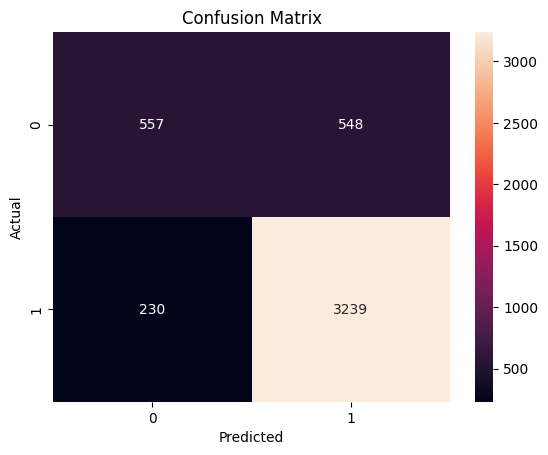

In [30]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Model
A Decision Tree is a non-linear model that splits the data into subsets based on feature values. It is easy to interpret but prone to overfitting if not pruned properly.

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Build Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Predictions on the Test set
y_pred = model_dt.predict(X_test)

Classification Report

In [19]:
# Accuracy
print("Accuracy:", model_dt.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.7870572802798426
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1105
           1       0.86      0.86      0.86      3469

    accuracy                           0.79      4574
   macro avg       0.71      0.71      0.71      4574
weighted avg       0.79      0.79      0.79      4574



Confusion Matrix

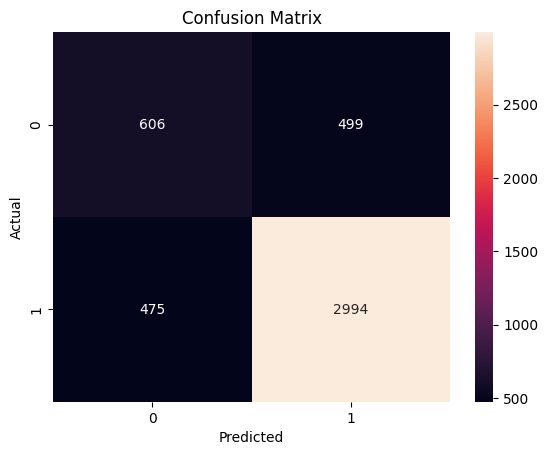

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Model
Random Forest is an ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It helps in reducing overfitting and improves generalization.



In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions on the Test set
y_pred = model_rf.predict(X_test)


Classification Report

In [23]:
# Accuracy
print("Accuracy:", model_rf.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.829908176650634
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      1105
           1       0.86      0.93      0.89      3469

    accuracy                           0.83      4574
   macro avg       0.78      0.72      0.74      4574
weighted avg       0.82      0.83      0.82      4574



Confusion Matrix

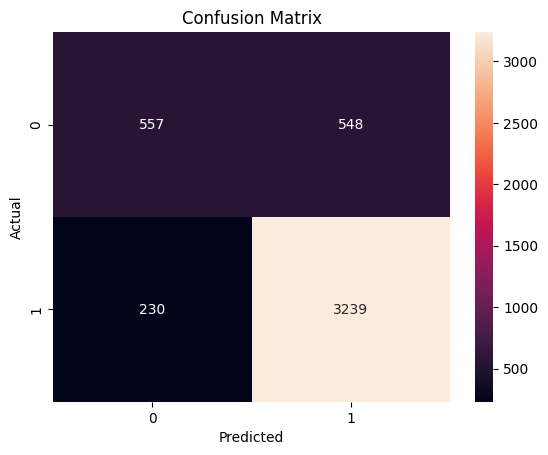

In [27]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Create a DataFrame to store the model names and their accuracies
results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Add the results to the DataFrame
results = results.append({'Model': 'Logistic Regression', 'Accuracy': model_lr.score(X_test, y_test)}, ignore_index=True)

results = results.append({'Model': 'Decision Tree', 'Accuracy': model_dt.score(X_test, y_test)}, ignore_index=True)

results = results.append({'Model': 'Random Forest', 'Accuracy': model_rf.score(X_test, y_test)}, ignore_index=True)

print(results)

                 Model  Accuracy
0  Logistic Regression  0.836686
1        Decision Tree  0.787057
2        Random Forest  0.829908


## Model Comparison and Analysis

### Logistic Regression

**Accuracy:** 83.67%
**Precision (Class 0):** 80%
**Recall (Class 0):** 43%
**F1-Score (Class 0):** 56%
**Precision (Class 1):** 84%
**Recall (Class 1):** 97%
**F1-Score (Class 1):** 90%

**Analysis:**
The Logistic Regression model achieved an accuracy of 83.67%. It shows higher precision, recall, and F1-score for Class 1 (non-fake news), indicating strong performance in correctly identifying non-fake news articles. However, it has lower performance metrics for Class 0 (fake news), with a recall of 43%.

### Decision Tree

**Accuracy:** 78.71%
**Precision (Class 0):** 56%
**Recall (Class 0):** 55%
**F1-Score (Class 0):** 55%
**Precision (Class 1):** 86%
**Recall (Class 1):** 86%
**F1-Score (Class 1):** 86%

**Analysis:**
The Decision Tree model achieved an accuracy of 78.71%. It shows balanced precision and recall for both classes but generally lower compared to Logistic Regression and Random Forest.

### Random Forest

**Accuracy:** 82.99%
**Precision (Class 0):** 71%
**Recall (Class 0):** 50%
**F1-Score (Class 0):** 59%
**Precision (Class 1):** 86%
**Recall (Class 1):** 93%
**F1-Score (Class 1):** 89%

**Analysis:**
The Random Forest model achieved an accuracy of 82.99%. It shows higher precision, recall, and F1-score for both classes compared to Decision Tree, indicating better performance in identifying both fake and non-fake news articles.

### Comparison Summary

- **Logistic Regression** demonstrates the highest overall accuracy (83.67%) and strong performance in identifying non-fake news articles (Class 1).
- **Random Forest** shows competitive performance with balanced metrics for both classes and slightly lower accuracy (82.99%) compared to Logistic Regression.
- **Decision Tree** exhibits lower overall performance metrics compared to both Logistic Regression and Random Forest.

Based on these findings, **Logistic Regression** appears to be the most suitable model for this task, especially if correctly identifying non-fake news articles is a priority. Random Forest also offers strong performance and could be an alternative depending on specific project requirements.
